In [1]:
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\pintu\AppData\Local\Microsoft\Windows\INetCache\IE\VU2COGH1\nissan-dataset[1].csv')


In [4]:
df.head()

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,2,Lenee Eteen,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,3,Kendal Esselin,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,4,Nehemiah Marvelley,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,5,Domenic McGeouch,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22


In [5]:
df.shape

(10000, 10)

 we have a dataset about the informatio of cars which has 10000 raws and 10 columns

# Data cleaning


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  int64  
 1   full_name    9157 non-null   object 
 2   age          9154 non-null   float64
 3   gender       9144 non-null   object 
 4   model        9130 non-null   object 
 5   color        9139 non-null   object 
 6   performance  9143 non-null   float64
 7   km           9141 non-null   float64
 8   condition    9151 non-null   object 
 9   price        9159 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [7]:
not_null_mask = df[['model','color','km','performance','condition','price']].notnull().all(axis=1)
not_null_rows = df[not_null_mask]

df = not_null_rows

In [8]:
df.isna().sum()

id              0
full_name       1
age             4
gender         14
model           0
color           0
performance     0
km              0
condition       0
price           0
dtype: int64

In [9]:
df.drop_duplicates()

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,2,Lenee Eteen,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,3,Kendal Esselin,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,4,Nehemiah Marvelley,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,5,Domenic McGeouch,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Mike Wilson,63.0,Polygender,Juke,Yellow,339.0,715741.0,new,19710.18
9996,9997,Katie Wilson,45.0,Female,Maxima,Gray,81.0,786768.0,bad,47797.76
9997,9998,Jane Davis,27.0,Female,Leaf,Yellow,130.0,99170.0,very bad,35058.91
9998,9999,Katie Smith,68.0,Male,March / Micra,Green,215.0,640764.0,old,21176.71


In [10]:
df.shape

(9072, 10)

1.There are 928 rows where the values are null in these columns, which will be useful further.

2.we will remove the columns 'id','full_name','age','gender' because these are not useful.

In [11]:
df.drop(columns=['id','full_name','age','gender'],inplace=True)

In [12]:
df.shape

(9072, 6)

In [13]:
df.head()

,model,color,performance,km,condition,price
0,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,R'nessa,Orange,109.0,965853.0,old,8687.90
2,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,Gloria,Green,336.0,573171.0,very good,32889.88
4,Avenir,Khaki,2.0,809470.0,old,6949.22


# EDA

In [14]:
df.sample()

,model,color,performance,km,condition,price
2004,Maxima,Purple,322.0,309248.0,old,13773.49


In [15]:
df['model'].value_counts()

model
Juke              879
Leaf              869
Gloria            858
Pathfinder        833
Maxima            830
                 ... 
X-Trail             8
Xterra              7
NV200 / Evalia      7
Fairlady Z          7
Rogue               4
Name: count, Length: 70, dtype: int64

In [17]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/e3/31/aeab8a3db1fb22a7d04c5215f872b92451baf7f6595ffd59004aeead0b2c/matplotlib-3.9.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/78/38/a046bb0ebce6f530175d434e7364149e338ffe1069ee286ed8ba7f6481ee/contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/6d/9a/b695930e1b4e6929cc60e294489421632a05c105ac8c56ee63ef56a47872/fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:-


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 108.9 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 108.9 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/294.9 kB 103.4 kB/s eta 0:00:03
   ---------- ---------------------------- 81.9/294.9 kB 208.4 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.9 kB 209.5 kB/s eta 0:00:01
   ------------ -------------------------


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Univariate-Analysis

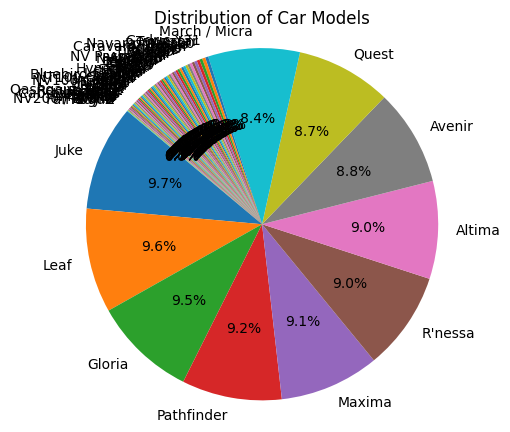

In [17]:
model_counts = df['model'].value_counts()

plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

there are more cars of model 'juke','Leaf','Gloria','Pathfinder','Maxima','R'nessa','Altima','Avenir','Quest','March/Micra' etc. in comparision to other models

In [18]:
df['color'].value_counts()

color
Green         893
Red           891
Purple        882
Yellow        873
Blue          847
Silver        844
Orange        811
Black         810
White         805
Gray          792
Khaki          59
Puce           54
Aquamarine     52
Teal           50
Crimson        50
Fuscia         49
Goldenrod      48
Turquoise      47
Maroon         46
Violet         46
Indigo         42
Mauv           41
Pink           40
Name: count, dtype: int64

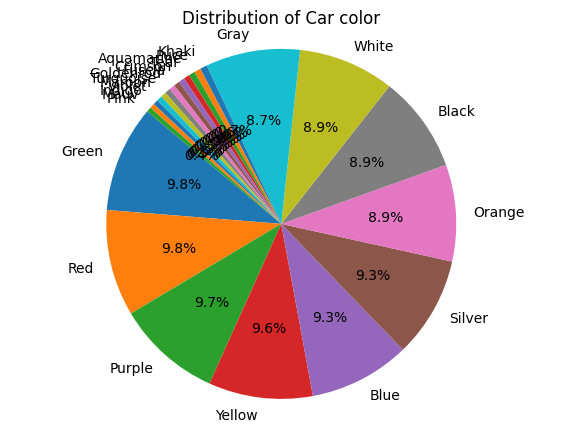

In [19]:
color_counts = df['color'].value_counts()

plt.figure(figsize=(7, 5))
wedges, texts, autotexts = plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car color')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

There are more cars of color 'Grren','Red','Purple','Yellow','Blue','Silver','Orange','Black','White','Gray' in comparision to other colors.

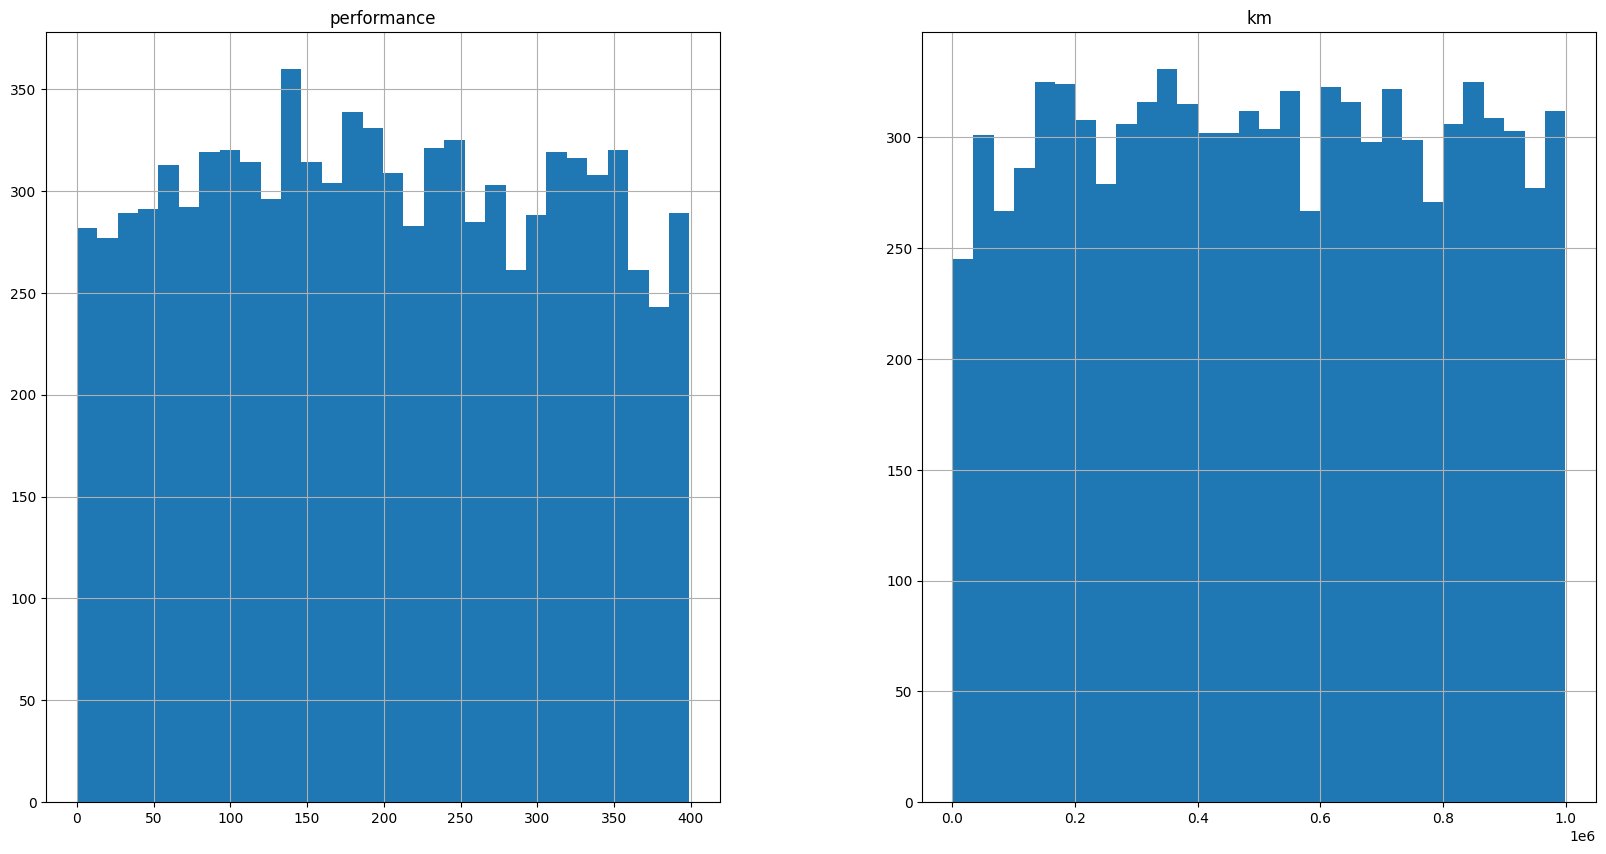

In [20]:
df[['performance', 'km']].hist(bins=30, figsize=(20, 10))
plt.show()

<Axes: xlabel='condition'>

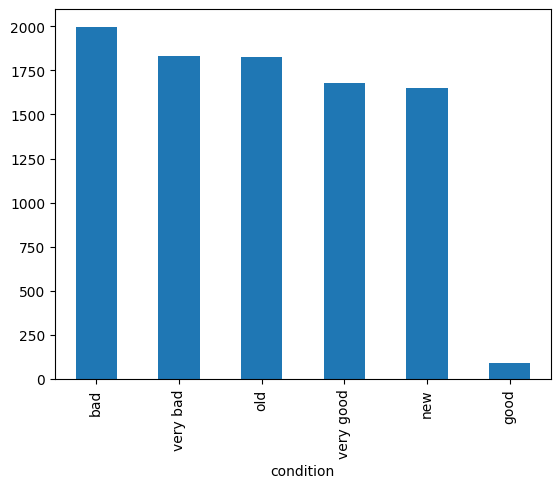

In [21]:
plt.hist(df['condition'].value_counts())
df['condition'].value_counts().plot(kind='bar')

there are less no. of cars with good condition.


In [22]:
df['price'].describe()

count      9072.000000
mean      27357.144300
std       13460.700785
min        5000.250000
25%       15958.235000
50%       27328.295000
75%       38386.822500
max      215674.780000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

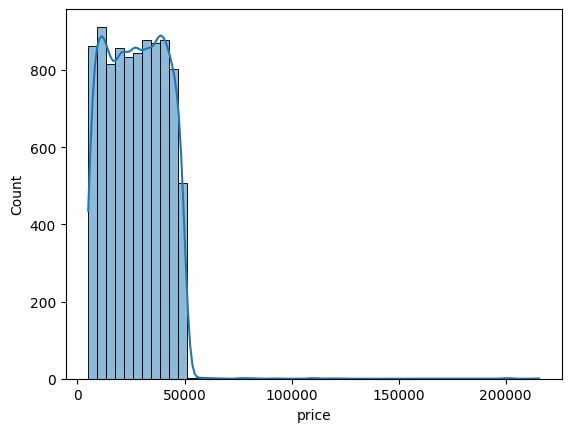

In [23]:
sns.histplot(df['price'], kde=True, bins=50)

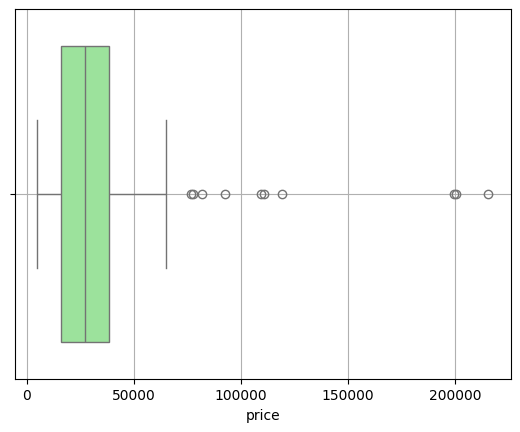

In [24]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [25]:
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

0.8698277801985245 9.447990960631145


1.The skewness value of 0.8698 suggests that the distribution of car prices is moderately positively skewed. This indicates that there are more lower-priced cars, but there are also some higher-priced cars that stretch the right tail of the distribution.

2.The kurtosis value of 9.4480 is significantly higher than 3, which indicates that the distribution has heavy tails. This means there are more extreme values (both high and low prices) than what would be expected in a normal distribution.

3.There are some outliers in our dataser but these will be usefull for predicting prices of the cars with good condtion.

# 2.Multivariate-Analysis

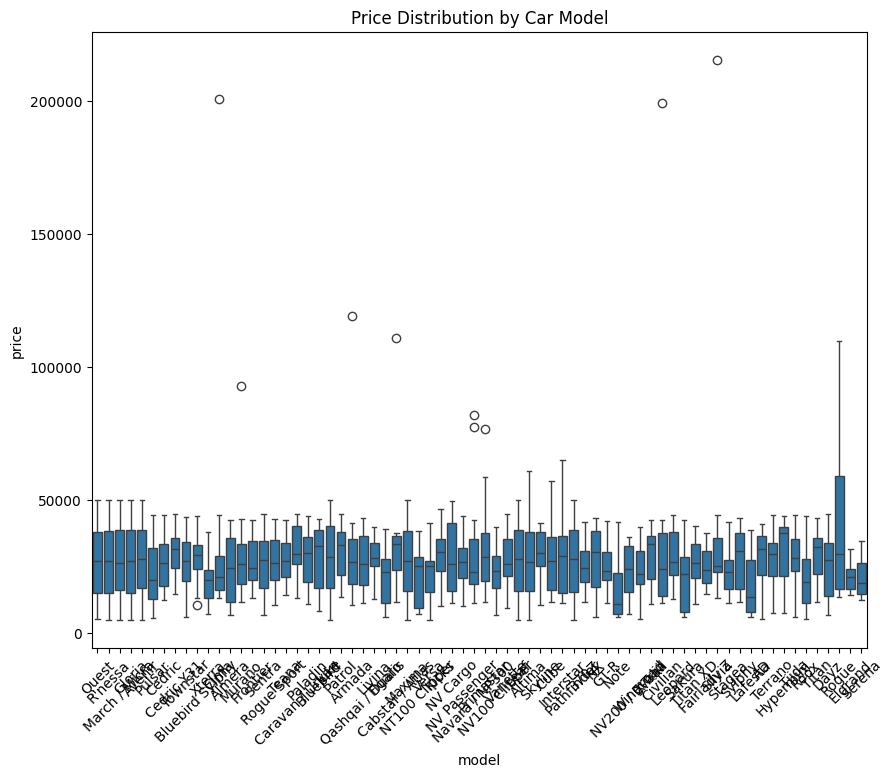

In [26]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='model', y='price', data=df)
plt.title('Price Distribution by Car Model')
plt.xticks(rotation=45)
plt.show()

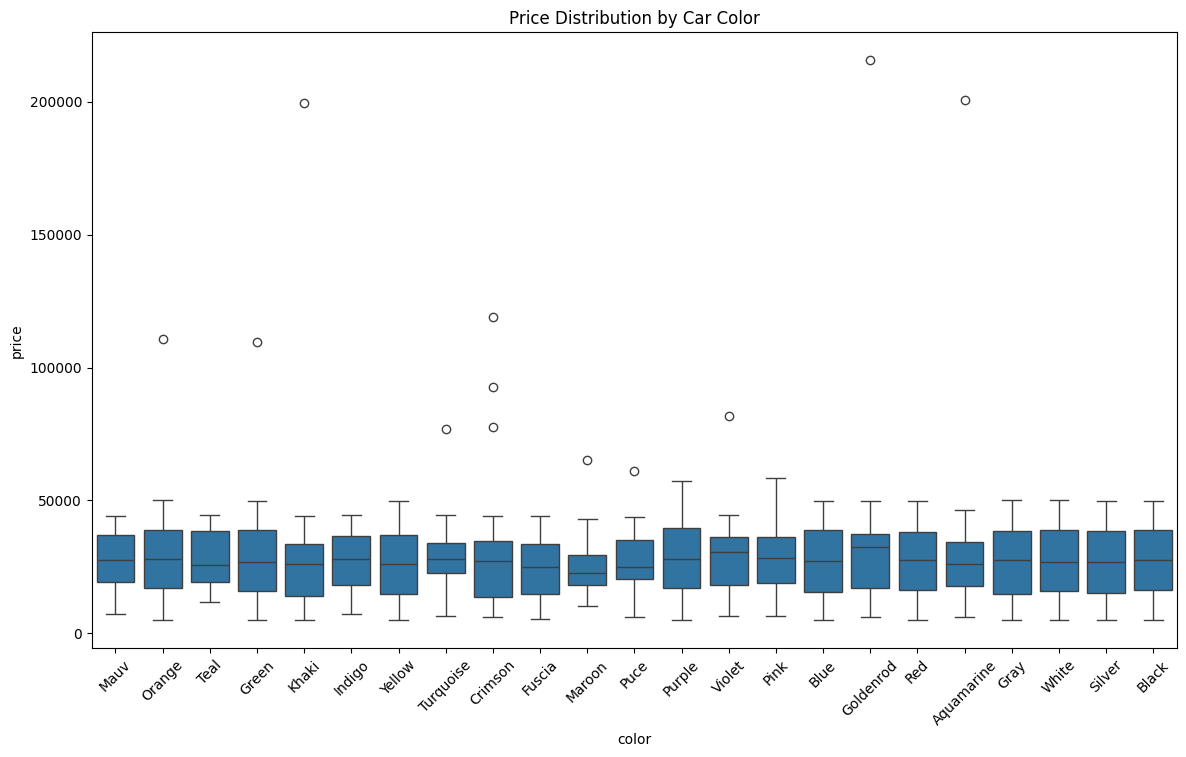

In [27]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='color', y='price', data=df)
plt.title('Price Distribution by Car Color')
plt.xticks(rotation=45)
plt.show()

prices are high of the cars of colors 'Orange','Green','Crimson','Maroon' etc.

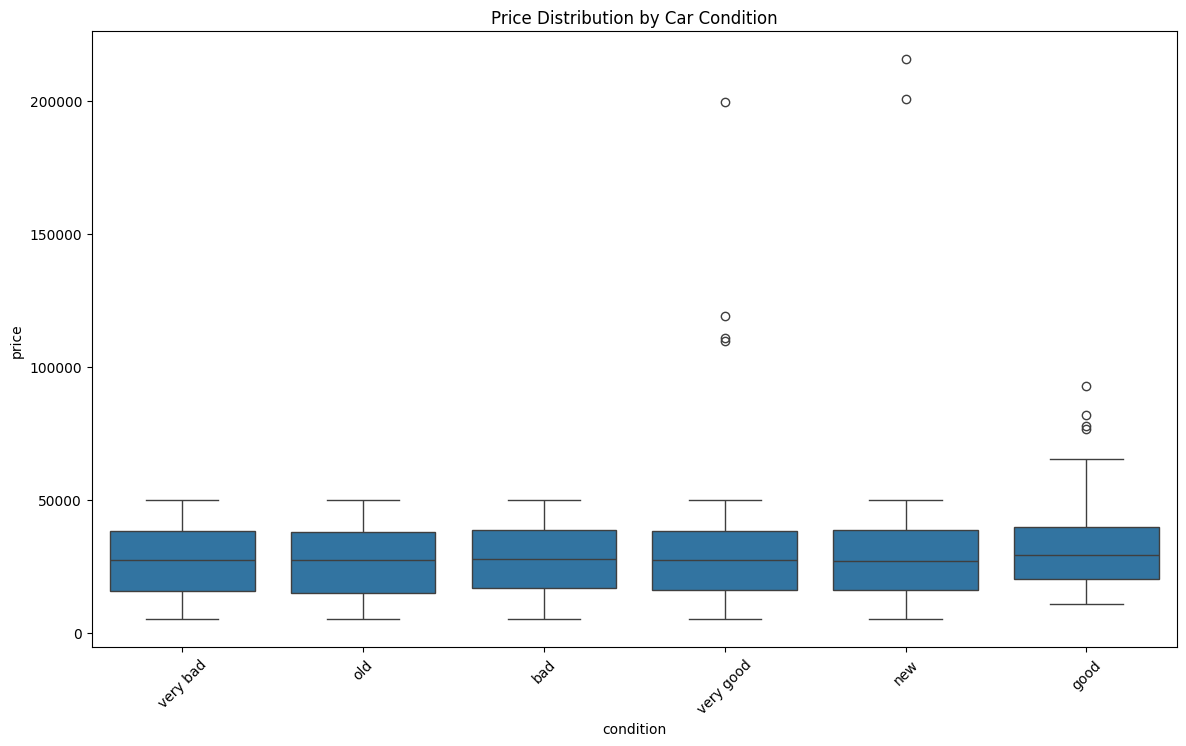

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Price Distribution by Car Condition')
plt.xticks(rotation=45)
plt.show()

prices are high of cars with very good and good conditions

In [29]:
df.to_csv('cleaned_data.csv',index=False)